In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver # 需要安装 pip install selenium
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
URL="https://www.google.com/flights/explore/#explore;f=JFK,EWR,LGA;t=HND,NRT,TPE,HKG,KIX;s=1;li=6;lx=12;d=2018-02-01"
# 下载http://phantomjs.org/download.html，并指定可执行文件的路径
PJS_PATH = '../phantomjs-2.1.1-macosx/bin/phantomjs'
driver = webdriver.PhantomJS(PJS_PATH)
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.80 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap, executable_path=PJS_PATH)
driver.implicitly_wait(20)
driver.get(URL)

In [10]:
# 等上一步执行完了再执行本步，否则截取到的屏幕是还没加载出网页的
driver.save_screenshot(r'flight_explorer.png')

True

In [11]:
s = BeautifulSoup(driver.page_source, "lxml")

<!DOCTYPE html>
<html lang="en-US"><head><meta content="text/html; charset=utf-8" http-equiv="content-type"/><meta content="baseUrl=/flights/explore//static/" name="deals::gwt:property"/><title>Explore flights</title><meta content="Explore flights" name="description"/><script async="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.yoTdpQipo6s.O/m=gapi_iframes,googleapis_client,plusone/rt=j/sv=1/d=1/ed=1/am=AAE/rs=AHpOoo9_VhuRoUovwpPPf5LqLZd-dmCnxw/cb=gapi.loaded_0"></script><script language="javascript" type="text/javascript">
var __JS_ILT__ = new Date();
</script>
<style type="text/css">@-webkit-keyframes gb__a{0%{opacity:0}50%{opacity:1}}@keyframes gb__a{0%{opacity:0}50%{opacity:1}}.gb_8a{display:none!important}.gb_9a{visibility:hidden}.gb_5c{display:inline-block;padding:0 0 0 15px;vertical-align:middle}.gb_5c:first-child,#gbsfw:first-child+.gb_5c{padding-left:0}.gb_Mc{position:relative}.gb_b{display:inline-block;outline:none;vertical-align:middle;-webkit-border-ra
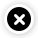
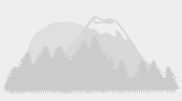

In [12]:
s

In [13]:
# best_price_tags = s.findAll('div', 'FTWFGDB-w-e') 
best_price_tags = s.findAll('span', 'CTPFVNB-v-k') # 获取最佳价格列表
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$',''))) # 删除$符号，剩下就是价钱的数值了

In [14]:
best_price_tags

[<span class="CTPFVNB-v-k">$457</span>,
 <span class="CTPFVNB-v-k">$598</span>,
 <span class="CTPFVNB-v-k">$841</span>,
 <span class="CTPFVNB-v-k">$844</span>]

In [15]:
best_price = best_prices[0]
best_price # 拥有最便宜票价的城市的票价

457

In [16]:
best_height_tags = s.findAll('div', 'CTPFVNB-w-x') # 得到每个条的高度
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
                              .split('height:')[1].replace('px;','')))
best_heights

[52.7293769256731,
 79.48009275892478,
 65.10071746633135,
 52.74091735528192,
 76.19684053521465,
 69.37067642159585,
 93.52479559286235,
 86.15046107282447,
 83.61156655888341,
 103.91118224080304,
 94.71345984257113,
 94.71345984257113,
 100.76064495759437,
 72.41734983832512,
 72.41734983832512,
 106.0,
 93.37477000794765,
 93.37477000794765,
 86.15046107282447,
 81.73047653264527,
 88.94324503815963,
 88.94324503815963,
 83.61156655888341,
 81.73047653264527,
 78.07216034664837,
 88.98940675659492,
 81.73047653264527,
 78.07216034664837,
 78.07216034664837,
 83.61156655888341,
 81.73047653264527,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 83.61156655888341,
 81.73047653264527,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 83.61156655888341,
 83.61156655888341,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 72.41734983832512,
 83.6115665

In [17]:
best_height = best_heights[0]
best_height

52.7293769256731

In [18]:
pph = np.array(best_price)/np.array(best_height) # 计算该高度对应的价格
pph

8.6668955076822449

In [19]:
cities = s.findAll('div', 'CTPFVNB-w-o')
# cities = s.findAll('span', 'CTPFVNB-v-c')
cities

[<div class="CTPFVNB-w-o CTPFVNB-w-b"><div class="CTPFVNB-w-x CTPFVNB-w-f" style="left: 0px; height: 52.7293769256731px;"></div><div class="CTPFVNB-w-x" style="left: 6px; height: 79.48009275892478px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 12px; height: 65.10071746633135px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 18px; height: 52.74091735528192px;"></div><div class="CTPFVNB-w-x" style="left: 24px; height: 76.19684053521465px;"></div><div class="CTPFVNB-w-x" style="left: 30px; height: 69.37067642159585px;"></div><div class="CTPFVNB-w-x" style="left: 36px; height: 93.52479559286235px;"></div><div class="CTPFVNB-w-x" style="left: 42px; height: 86.15046107282447px;"></div><div class="CTPFVNB-w-x" style="left: 48px; height: 83.61156655888341px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 54px; height: 103.91118224080304px;"></div><div class="CTPFVNB-w-x CTPFVNB-w-M" style="left: 60px; height: 94.71345984257113px;"></div><div class="CTPFVNB-w-x"

In [20]:
len(cities)

4

In [22]:
hlist=[] # 得到城市0柱状图中的所有价格
for bar in cities[0]\
    .findAll('div', 'CTPFVNB-w-x'):
    hlist.append(float(bar['style']\
                       .split('height: ')[1].replace('px;',''))*pph)
hlist

[457.0,
 688.84565888249335,
 564.22111575583824,
 457.10001969753347,
 660.39005493423224,
 601.22840384320762,
 810.56963078067895,
 746.65704405681652,
 724.65271059946167,
 900.58735856076692,
 820.87165962662243,
 820.87165962662243,
 873.28198113414021,
 627.6336039920335,
 627.6336039920335,
 918.69092381431801,
 809.26937471274425,
 809.26937471274425,
 746.65704405681652,
 708.34949990151244,
 770.86181085990688,
 770.86181085990688,
 724.65271059946167,
 708.34949990151244,
 676.6432557834147,
 771.26188965004053,
 708.34949990151244,
 676.6432557834147,
 676.6432557834147,
 724.65271059946167,
 708.34949990151244,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 724.65271059946167,
 708.34949990151244,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 724.65271059946167,
 724.65271059946167,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 627.6336039920335,
 62

In [23]:
fares = pd.DataFrame(hlist, columns=['price'])

In [24]:
fares.min()

price    457.0
dtype: float64

In [26]:
fares

,price
0,457.000000
1,688.845659
2,564.221116
3,457.100020
4,660.390055
5,601.228404
6,810.569631
7,746.657044
8,724.652711
9,900.587359


In [27]:
fares.median()

price    708.3495
dtype: float64

In [28]:
fares.describe()

,price
count,60.000000
mean,694.821002
std,90.152352
min,457.000000
25%,627.633604
50%,708.349500
75%,746.657044
max,918.690924


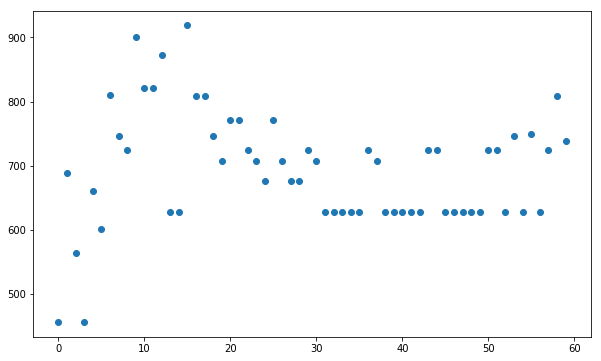

In [30]:
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(np.arange(len(fares['price'])),fares['price']);

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()
ff

,index,fare
0,0,457.000000
1,1,688.845659
2,2,564.221116
3,3,457.100020
4,4,660.390055
5,5,601.228404
6,6,810.569631
7,7,746.657044
8,8,724.652711
9,9,900.587359


Text(0.5,1.01,'Total Clusters: 9')

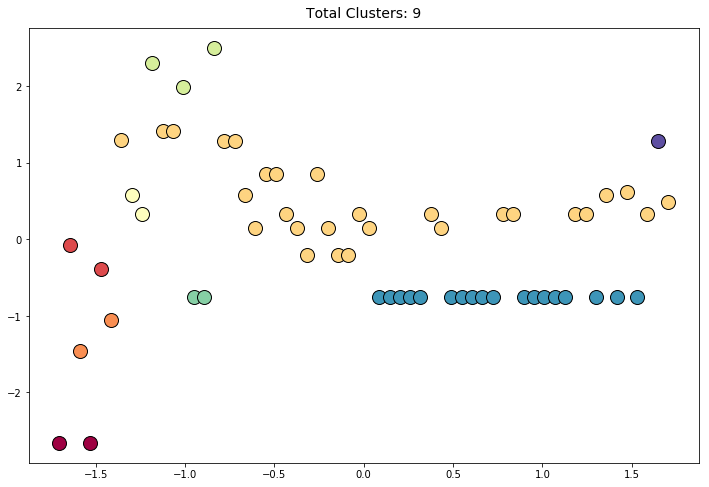

In [35]:
# 使用StandardScaler()方法，这个对象将获取 数据，对每个点减去平均值，然后除以标准差
# 这个步骤使所有的数据位于相同的基础之上
X = StandardScaler().fit_transform(ff) 

# 标准化之后的数据被传递给了DBSCAN对象
# 参数epsilon确定在同一聚类中两个点彼此之间的距离
# min_samples是成为聚类的最小点数，如果它大于 1，就有可能某些点不隶属于任何聚类，这些点就被认作噪声
db = DBSCAN(eps=.5, min_samples=1).fit(X)

# 因为min_points 设置为1，故每个点都将关联一个聚类ID。这些聚类将被标记为从 0 到n-1，其中n是聚类的总数。
labels = db.labels_
clusters = len(set(labels)) # 获得聚类的总数
unique_labels = set(labels) # 获得聚类的唯一标签
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels))) # 为图像生成了有颜色的图

# 对每个聚类应用唯一的颜色，并使用聚类的总数为图像设置标题
plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [36]:
def test_clusters(data_series, eps_val, swap_index, swap_value):
    data_series[swap_index] = swap_value
    ff = pd.DataFrame(data_series, columns=['fare']).reset_index()
    X = StandardScaler().fit_transform(ff)
    db = DBSCAN(eps=eps_val, min_samples=1).fit(X)

    labels = db.labels_
    clusters = len(set(labels))
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0,
                            1, len(unique_labels)))

    plt.subplots(figsize=(12,8))

    for k, c in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o',
                 markerfacecolor=c,
                 markeredgecolor='k',
                 markersize=14)

    plt.title("Total Clusters: {}".format(clusters),
              fontsize=14, y=1.01)

In [37]:
px = [x for x in fares['price']]

In [38]:
px[55]

750.25775316801992

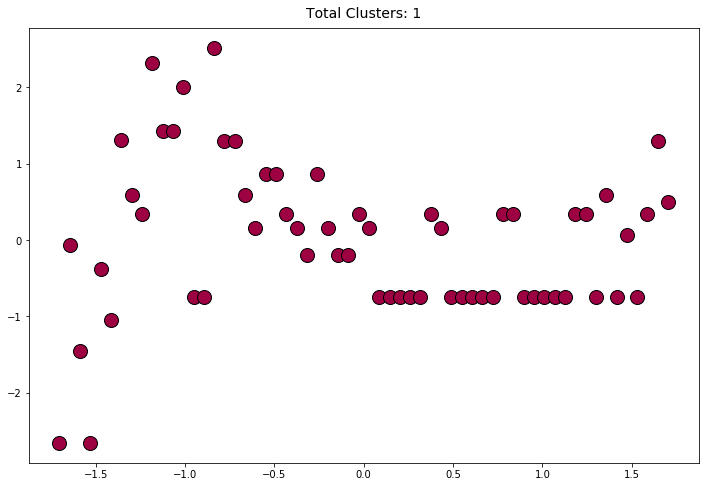

In [39]:
test_clusters(px, 1.5, 55, 700)

In [40]:
px[55]

700

In [41]:
px[55] = 625

In [42]:
ff = pd.DataFrame(px, columns=['fare']).reset_index()

Text(0.5,1.01,'Total Clusters: 1')

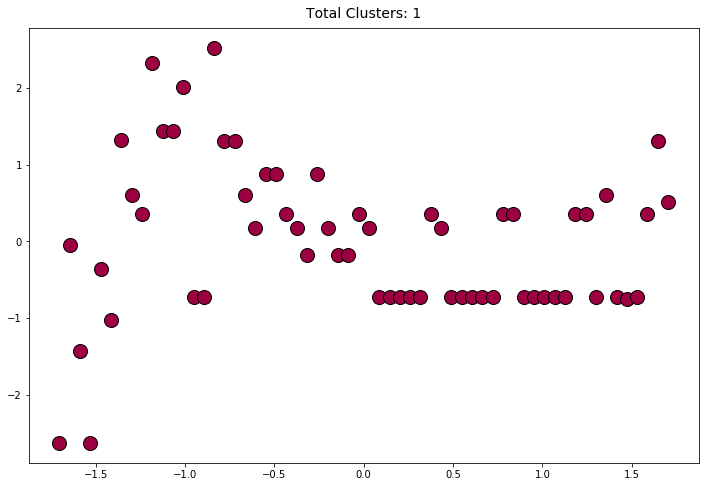

In [43]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=1.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,
                        1, len(unique_labels)))

plt.subplots(figsize=(12,8))

for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=c,
             markeredgecolor='k',
             markersize=14)

plt.title("Total Clusters: {}".format(clusters),
          fontsize=14, y=1.01)

In [44]:
pf = pd.concat([ff,pd.DataFrame(db.labels_,
                                columns=['cluster'])], axis=1)
pf

,index,fare,cluster
0,0,457.000000,0
1,1,688.845659,0
2,2,564.221116,0
3,3,457.100020,0
4,4,660.390055,0
5,5,601.228404,0
6,6,810.569631,0
7,7,746.657044,0
8,8,724.652711,0
9,9,900.587359,0


In [45]:
rf = pf.groupby('cluster')['fare'].agg(['min','count']).sort_values('min', ascending=True)
rf

,min,count
cluster,,
0,457.0,60


In [ ]:
rf.iloc[0]['min']

In [ ]:
pf['fare'].min()

In [ ]:
rf.describe([.10,.25,.5,.75,.9])

In [ ]:
# we want min of the price cluster to equal the overall min 
# as well as to be in the bottom quartile of sizes

In [ ]:
rf['count'].quantile(.10)

In [ ]:
pd.Series([50,6,4]).quantile(.10)